In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
k = 0.001
h = 1 / 50.

In [7]:
def freq(array):
    """
    estimate frequency of oscillation my finding the location of the maximum
    value of the fourier transform
    """
    FT = np.abs(np.fft.fft(array))
    frequency = np.fft.fftfreq(len(array), k)
    i = frequency > 0
    maximum = np.max(FT[i])
    index = np.where(FT == maximum)[0][0]
    plt.plot(frequency[i], FT[i])
    plt.xlim(0, 5)
    plt.show()
    return frequency[index]

# File Handling

In [5]:
ratios = []
n_list = []
J_list = []
for filename in os.listdir("Data/"):
    if filename.startswith("dsAnnular-n"):
        ratios.append(float(filename[12:17]))
        n_list.append(np.loadtxt("Data/" + filename))
    if filename.startswith("dsAnnular-J"):
        J_list.append(np.loadtxt("Data/" + filename))
J_dict = dict(zip(ratios, J_list))
n_dict = dict(zip(ratios, n_list))

# Plots
## Frequency v. Ratio, Amplitude v. Ratio
How do the frequency and amplitude change as the two radii are brought further apart (i.e. the ratio $\frac{R_1 - R_2}{R_1}$ is increased)?

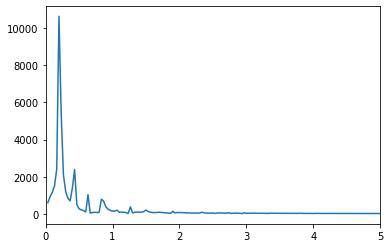

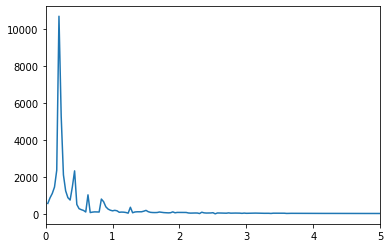

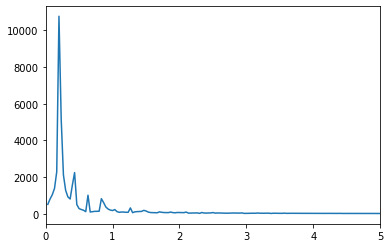

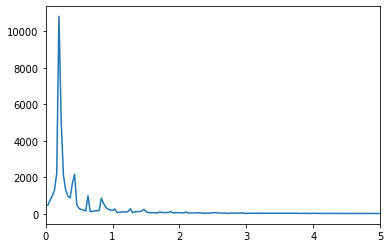

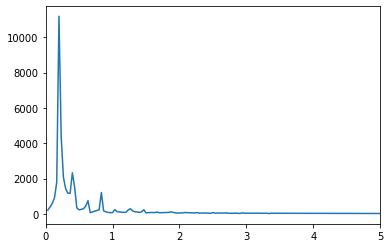

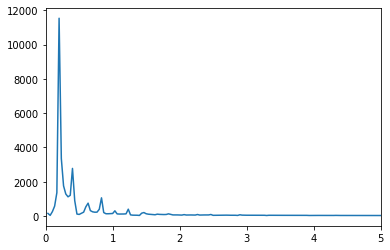

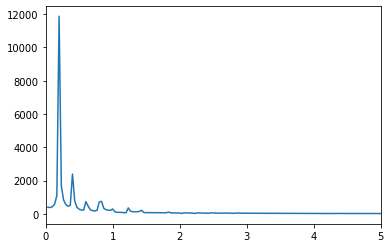

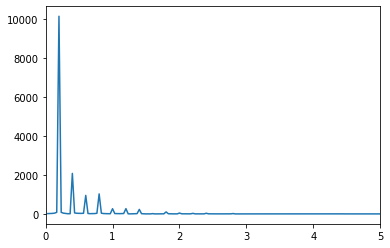

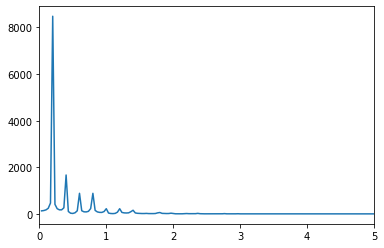

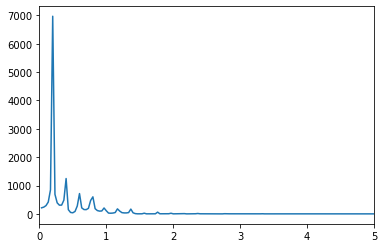

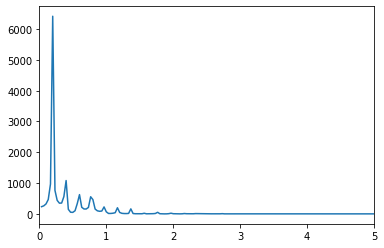

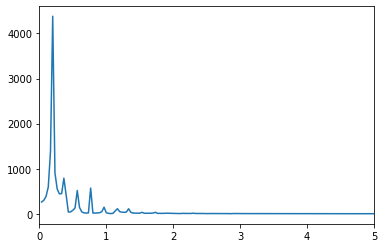

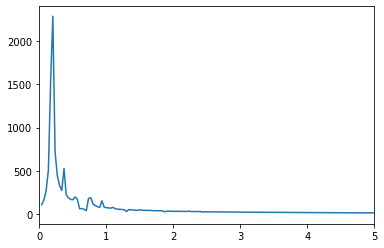

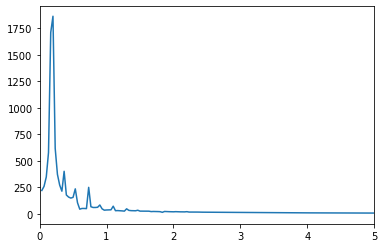

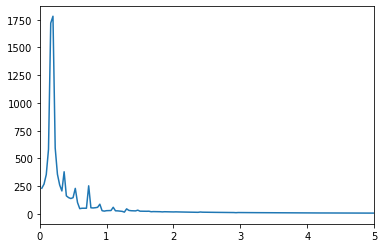

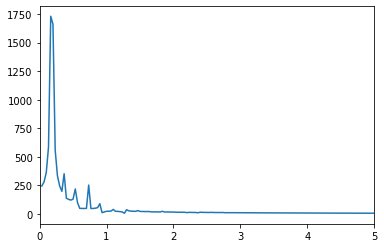

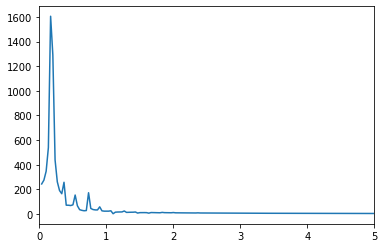

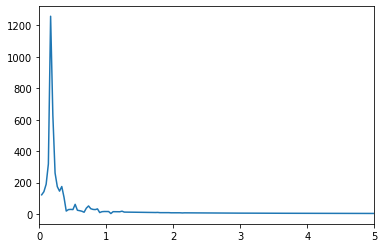

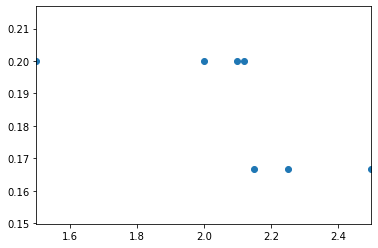

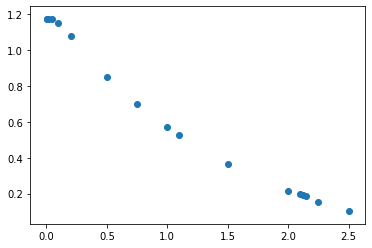

In [9]:
# 
frequencies = []
amplitudes = []
for array in n_list:
    n = array[20000:,-1]
    amplitudes.append(np.max(n) - 1)
    frequency = freq(n)
    frequencies.append(frequency)

fig1 = plt.figure()
plt.scatter(ratios, frequencies)
plt.xlim(1.5,2.5)
plt.show()

fig2 = plt.figure()
plt.scatter(ratios, amplitudes)
plt.show()
    

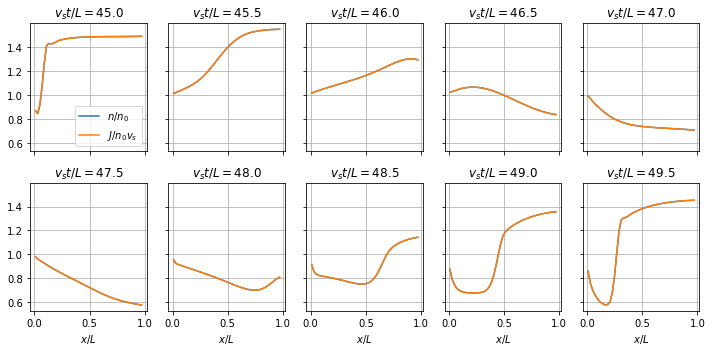

In [195]:
h = 1/50
k = 0.001
fig3, axes3 = plt.subplots(2, 5, figsize = (10,5), sharex = True, sharey = True)
xMid = np.arange(0., 1., h)[:-1] + h / 2
J_snapshots = []
n_snapshots = []
delta = 0.5 #time difference between snapshots in seconds
start = 45. #time to start snapshots in seconds
for number in range(10):
    index = int((start + delta * number) / k)
    J_snapshots.append(J_dict[1.00][index])
    n_snapshots.append(n_dict[1.00][index])
index = 0
for i in axes3:
    for axis in i:
        axis.grid()
        axis.plot(xMid, n_snapshots[index], label = "$n/n_0$")
        axis.plot(xMid, J_snapshots[index], label = "$J/n_0v_s$")
        axis.set_title("$v_st/L = {:.1f}$".format(start + delta * index))
        index += 1
for axis in axes3[-1]:
    axis.set_xlabel("$x/L$") #Set label only on the bottom axes
axes3[0,0].legend()
fig3.tight_layout()
plt.show()

In [10]:
print(ratios)

[0.001, 0.005, 0.01, 0.015, 0.05, 0.1, 0.2, 0.5, 0.75, 1.0, 1.1, 1.5, 2.0, 2.1, 2.12, 2.15, 2.25, 2.5]


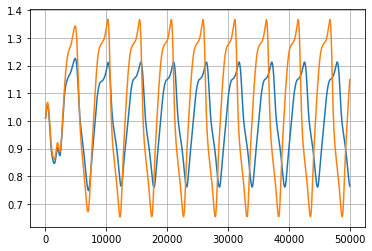

In [208]:
plt.plot(n_dict[2.00][:,-1])
plt.plot(n_dict[1.50][:,-1])
plt.grid()
plt.show()


In [12]:
print(frequencies[14])

0.19999333355554816
